<a href="https://colab.research.google.com/github/momoArdestani/MatthewAnderson/blob/main/Topics_in_Computer_Science_Assignment_1_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authentication

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
def load_file_from_drive(id, name):
    downloaded = drive.CreateFile({'id':id})
    downloaded.GetContentFile(name)

In [6]:
load_file_from_drive('1qpYgoSffo-vnToEICZ00ti7yDBlE2lB_', 'airline-train.csv')

In [7]:
load_file_from_drive('14Ol8uFYnN2n0u6bckBIoA7qvjzObS7BS', 'airline-test.csv')

In [8]:
load_file_from_drive('1m9UXuUQetVQbM-CI_6TdADFXAziV2v2i', 'airline-dev.csv')

In [9]:
!ls

adc.json  airline-dev.csv  airline-test.csv  airline-train.csv	sample_data


In [ ]:
# from google.colab import drive
# import warnings
# drive.mount('/gdrive', force_remount=True)
# %cd /the/path/to/the/folder/containing/the/dataset/on/your/google/drive

Hi hi Hi

Importing the necessary modules

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
!ls

1-Data-Cleaning.ipynb  airline-dev.csv	 airline-train.csv  sample_data
adc.json	       airline-test.csv  drive


In [20]:
cd drive

/content/drive


In [21]:
cd MyDrive

/content/drive/MyDrive


In [22]:
cd NLPcourse


/content/drive/MyDrive/NLPcourse


In [23]:
cd NLP

/content/drive/MyDrive/NLPcourse/NLP


In [24]:
cd Alice

/content/drive/MyDrive/NLPcourse/NLP/Alice


In [25]:
!ls

0-Hello-World.ipynb		   4-Topic-Modeling.ipynb   README.md
1-Data-Cleaning.ipynb		   5-Text-Generation.ipynb  transcripts
2-Exploratory-Data-Analysis.ipynb  notes.md		    UseAirlines.ipynb
3-Sentiment-Analysis.ipynb	   pickle


In [26]:
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']

In [27]:
import pickle


In [28]:
import os
os.getcwd()

'/content/drive/MyDrive/NLPcourse/NLP/Alice'

In [29]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [30]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [31]:
# More checks
data['louis'][:2]

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

In [ ]:
import pandas as pd
from nltk.tokenize import TweetTokenizer 
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
from collections import Counter
from nltk.stem import PorterStemmer 
import numpy as np
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
import re
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Configuring numpy

In [ ]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

Reading the dataset

In [ ]:
train_df = pd.read_csv('airline-train.csv')
test_df = pd.read_csv('airline-test.csv')
dev_df = pd.read_csv('airline-dev.csv')

In [ ]:
train_df.head()

,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,11429,681462729,False,finalized,3,2/25/15 3:07,positive,1.0,NaN,NaN,US Airways,NaN,CaraModisett,NaN,0,@USAirways she also appreciated having her ver...,NaN,2/18/15 10:55,5.681220e+17,"Memphis, Tennessee",Central Time (US & Canada)
1,9717,681461003,False,finalized,3,2/25/15 3:20,negative,1.0,Can't Tell,0.3464,US Airways,NaN,LarrySandeen,NaN,0,@USAirways Just discovered that they billed us...,"[0.0, 0.0]",2/22/15 19:24,5.696990e+17,Southeastern Pennsylvania USA,NaN
2,10153,681461443,False,finalized,3,2/25/15 6:20,negative,1.0,Can't Tell,1.0000,US Airways,NaN,burseka,NaN,0,@USAirways u guys suck,NaN,2/22/15 7:28,5.695190e+17,NaN,NaN
3,975,681449647,False,finalized,3,2/25/15 2:14,negative,1.0,Can't Tell,1.0000,United,NaN,artistanxiety,NaN,0,@united I will but right now I'm to angry,NaN,2/23/15 14:09,5.699820e+17,Punk is the preacher.,Arizona
4,1511,681450373,False,finalized,3,2/25/15 6:57,negative,1.0,Can't Tell,0.6848,United,NaN,axelrodaj,NaN,0,@united not sure why the people in row 7 that ...,"[33.94077727, -118.39921036]",2/22/15 18:50,5.696910e+17,San Francisco,Pacific Time (US & Canada)


The list of columns having missing values

In [ ]:
train_df.columns

Index(['Unnamed: 0', '_unit_id', '_golden', '_unit_state',
       '_trusted_judgments', '_last_judgment_at', 'airline_sentiment',
       'airline_sentiment:confidence', 'negativereason',
       'negativereason:confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
train_df.columns[train_df.isnull().any()]

Index(['_last_judgment_at', 'negativereason', 'negativereason:confidence',
       'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord',
       'tweet_location', 'user_timezone'],
      dtype='object')

The percentage of missing values

In [ ]:
train_df_missing = train_df.isna()
train_df_missing.head()

,Unnamed: 0,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,False,False,False,False,False,False,False,False,True,True,False,True,False,True,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False


In [ ]:
train_num_missing = train_df_missing.sum()
train_num_missing/len(train_df)

Unnamed: 0                      0.000000
_unit_id                        0.000000
_golden                         0.000000
_unit_state                     0.000000
_trusted_judgments              0.000000
_last_judgment_at               0.004326
airline_sentiment               0.000000
airline_sentiment:confidence    0.000000
negativereason                  0.368511
negativereason:confidence       0.281876
airline                         0.000000
airline_sentiment_gold          0.997040
name                            0.000000
negativereason_gold             0.997382
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.927596
tweet_created                   0.000000
tweet_id                        0.000000
tweet_location                  0.325478
user_timezone                   0.326617
dtype: float64

Does the column 'retweet counts' help? (NO!)

In [ ]:
len(train_df.loc[(train_df['retweet_count'] == 0)])/len(train_df)

0.9494535519125683

Some basic information on how satisfied the passengers are (given the airline)

In [ ]:
for airline in train_df['airline'].unique():
    print('Airline: '+airline)
    positive_str = str(len(train_df.loc[(train_df['airline'] == airline) & (train_df['airline_sentiment'] =='positive')])/len(train_df.loc[(train_df['airline'] == airline)]))
    print('Positive: '+positive_str)
    negative_str = str(len(train_df.loc[(train_df['airline'] == airline) & (train_df['airline_sentiment'] =='negative')])/len(train_df.loc[(train_df['airline'] == airline)]))
    print('Negative: '+negative_str)
    neutral_str = str(len(train_df.loc[(train_df['airline'] == airline) & (train_df['airline_sentiment'] =='neutral')])/len(train_df.loc[(train_df['airline'] == airline)]))
    print('Neutral: '+neutral_str)
    print('')

Airline: US Airways
Positive: 0.09148446490218642
Negative: 0.7928653624856157
Neutral: 0.11565017261219793

Airline: United
Positive: 0.14011601963409193
Negative: 0.6849620705042392
Neutral: 0.1749219098616689

Airline: American
Positive: 0.12101534828807556
Negative: 0.7195985832349469
Neutral: 0.15938606847697756

Airline: Southwest
Positive: 0.2354533152909337
Negative: 0.5
Neutral: 0.2645466847090663

Airline: Delta
Positive: 0.25297619047619047
Negative: 0.42931547619047616
Neutral: 0.3177083333333333

Airline: Virgin America
Positive: 0.28027681660899656
Negative: 0.34256055363321797
Neutral: 0.3771626297577855



Since the 'text' column does not have any missing values, we can start working on it for the implementation of the basic classifier

In [ ]:
bc_train_df = train_df[['text','airline_sentiment']]
bc_train_df.head()

,text,airline_sentiment
0,@USAirways she also appreciated having her ver...,positive
1,@USAirways Just discovered that they billed us...,negative
2,@USAirways u guys suck,negative
3,@united I will but right now I'm to angry,negative
4,@united not sure why the people in row 7 that ...,negative


Feature Extraction

In [ ]:
stemmer = PorterStemmer()

In [ ]:
tokenizer = TweetTokenizer() 

In [ ]:
def prep(txt):
    txt = txt.split()
    txt = [stemmer.stem(t) for t in txt]
    txt = " ".join(txt)
    return txt

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = stopwords.words('english')
stopwords = set(stopwords)

In [ ]:
training_text = train_df['text'].to_list()
vectorizer = CountVectorizer(stop_words=stopwords, tokenizer=tokenizer.tokenize,max_features=5000, ngram_range=(1,1),min_df=5,preprocessor=prep)
vectorizer.fit(training_text)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', "should'v", 'themselv', 'thi', 'veri', 'wa', 'whi', "you'r", "you'v", 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=5000, min_df=5,
                ngram_range=(1, 1),
                preprocessor=<function prep at 0x7f913ed08400>,
                stop_words={'a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...},
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7f913ed074e0>>,
                vocabulary=None)

In [ ]:
x_train = vectorizer.transform(training_text).toarray()

In [ ]:
x_train.shape

(8784, 2088)

In [ ]:
testing_text = test_df['text'].to_list()
x_test = vectorizer.transform(testing_text).toarray()

In [ ]:
x_test.shape

(2928, 2088)

In [ ]:
train_sentiments = train_df['airline_sentiment'].to_list()
y_train = train_sentiments

In [ ]:
test_sentiments = test_df['airline_sentiment'].to_list()
y_test = test_sentiments

Applying Chi2

In [ ]:
transformer = SelectKBest(chi2, k=500).fit(x_train, y_train)

In [ ]:
x_train = transformer.transform(x_train)

In [ ]:
x_train.shape

(8784, 500)

In [ ]:
x_test = transformer.transform(x_test)

In [ ]:
x_test.shape

(2928, 500)

Training the classifier

In [ ]:
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Evaluation

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.81      0.90      0.85      1826
     neutral       0.66      0.44      0.53       636
    positive       0.70      0.72      0.71       466

    accuracy                           0.77      2928
   macro avg       0.72      0.68      0.70      2928
weighted avg       0.76      0.77      0.76      2928



Plotting the Confusion Matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y_test))-0.5)
    plt.ylim(len(np.unique(y_test))-0.5, -0.5)
    return ax

Confusion matrix, without normalization
[[1641  113   72]
 [ 289  279   68]
 [ 100   32  334]]


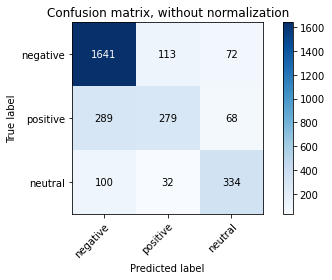

In [ ]:
plot_confusion_matrix(y_test, y_pred, classes=set(y_test))

Normalized confusion matrix
[[0.90 0.06 0.04]
 [0.45 0.44 0.11]
 [0.21 0.07 0.72]]


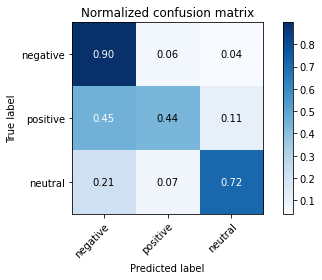

In [ ]:
plot_confusion_matrix(y_test, y_pred, classes=set(y_test), normalize=True)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1641,  113,   72],
       [ 289,  279,   68],
       [ 100,   32,  334]])

Query

In [ ]:
def query(tweet, clf, vectorizer, transformer):
    tweet_arr = vectorizer.transform([tweet])
    tweet_arr = transformer.transform(tweet_arr)
    return clf.predict(tweet_arr)[0]

In [ ]:
query('the food was awesome and tasted good',clf, vectorizer, transformer)

'positive'

Enhancements

*Extending the classes*

Feature extraction (a different way)

In [ ]:
train_sent_conf = train_df['airline_sentiment:confidence'].to_list()

In [ ]:
y_train = [1 if sentiment == 'positive' else (-1 if sentiment == 'negative' else 0) for sentiment in train_sentiments]

In [ ]:
y_train = [y*conf for y, conf in zip(y_train, train_sent_conf)]

In [ ]:
y_train = np.array(y_train)

In [ ]:
test_sent_conf = test_df['airline_sentiment:confidence'].to_list()

In [ ]:
y_test = [1 if sentiment == 'positive' else (-1 if sentiment == 'negative' else 0) for sentiment in test_sentiments]

In [ ]:
y_test = [y*conf for y, conf in zip(y_test, test_sent_conf)]

In [ ]:
y_test = np.array(y_test)

Training another classifier (this time: Multi-Layer Perceptron)

In [ ]:
regr = MLPRegressor(random_state=1, max_iter=5).fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [ ]:
y_pred = regr.predict(x_test)

In [ ]:
regr.score(x_test, y_test)

0.5346528427865724

Query

In [ ]:
def get_label(num):
    abs_num = abs(num)
    if num == 0:
        return 0
    else:
        temp_label = 0
        if 0 <= abs_num <= 0.2:
            temp_label = 1
        elif 0.2 < abs_num <= 0.4:
            temp_label = 2
        elif 0.4 < abs_num <= 0.6:
            temp_label = 3
        elif 0.6 < abs_num <= 0.8:
            temp_label = 4
        elif 0.8 < abs_num <= 1:
            temp_label = 5
        if abs_num != num:
            temp_label = -(temp_label)
        return temp_label

In [ ]:
get_label(-0.4)

-2

In [ ]:
get_label(0.6)

3

In [ ]:
def preprocess(tweet, tokenizer, stemmer, stopwords):
    tweet = tokenizer.tokenize(tweet)
    tweet = list([token for token in tweet if token not in stopwords])
    tweet = [stemmer.stem(token) for token in tweet]
    tweet = " ".join(tweet)
    return tweet

In [ ]:
def extended_query(tweet, regr, vectorizer, transformer):
    tweet_arr = vectorizer.transform([tweet])
    tweet_arr = transformer.transform(tweet_arr)
    output = regr.predict(tweet_arr)[0]
    output_str = 'positive' if output>0 else ('neutral' if output == 0 else 'negative')
    output_str += ' | intensity: '+str(abs(get_label(output)))
    print(output_str)

In [ ]:
extended_query('the flight was awesome',regr, vectorizer, transformer)

positive | intensity: 2


In [ ]:
extended_query('the flight was the best one and we enjoyed everything',regr, vectorizer, transformer)

positive | intensity: 3


In [ ]:
extended_query('what a great cabin crew! its the best flight ive ever had',regr, vectorizer, transformer)

positive | intensity: 4


In [ ]:
extended_query('the cabin crew were not friendly and their behavior was not appropriate',regr, vectorizer, transformer)

negative | intensity: 1
